In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor  
from sklearn.svm import SVR          #support vector Regressor
from sklearn import metrics     
from xgboost import XGBRegressor     #X G Boost Regressor

In [4]:
#reading the file
df = pd.read_excel("wine_quality.xlsx")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [7]:
#finding the no. of null value
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [8]:
#tackling the null value
df.loc[:, 'total sulfur dioxide'].fillna(df.loc[:,'total sulfur dioxide'].median(), inplace = True)
df.loc[:,"pH"].fillna(df['pH'].median(), inplace = True)
df.loc[: , "quality"].fillna( df['quality'].median() , inplace = True )
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#frequency percentage
round(100*df['quality'].value_counts(normalize = True),2)

5.0    42.53
6.0    39.96
7.0    12.45
4.0     3.31
8.0     1.13
3.0     0.63
Name: quality, dtype: float64

# Exploratory Data Analysis

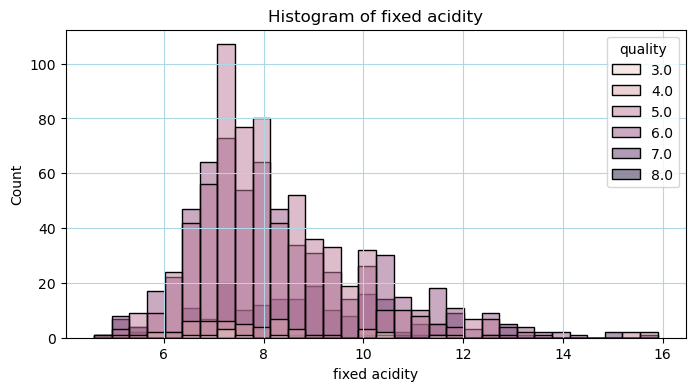

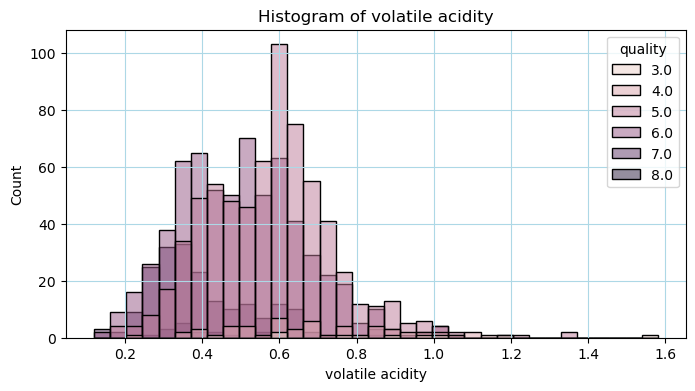

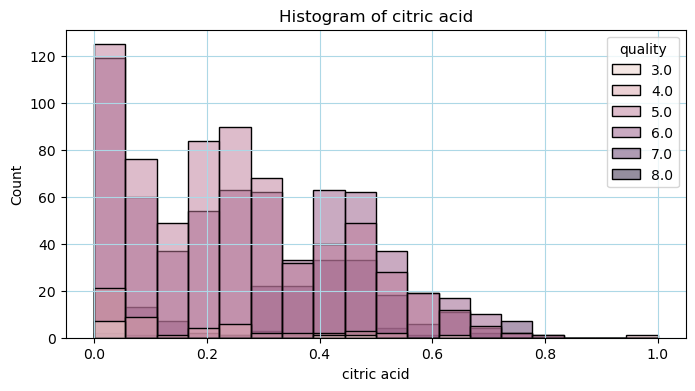

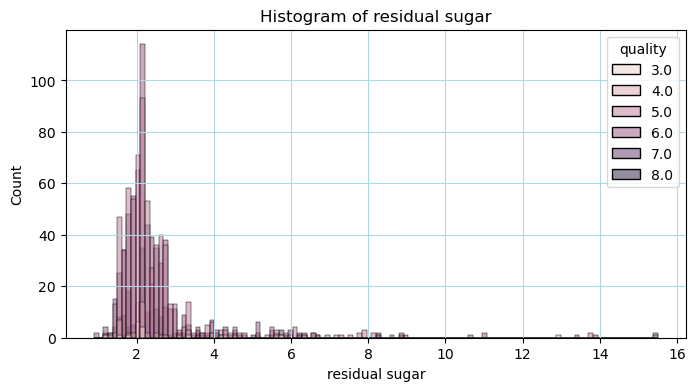

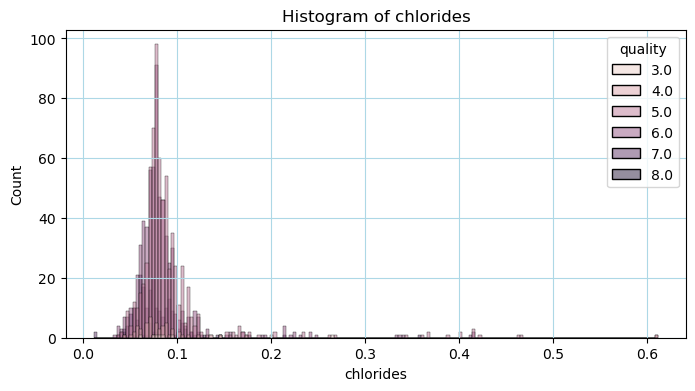

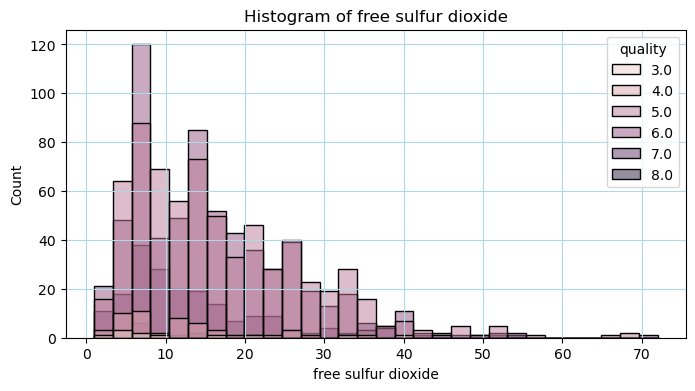

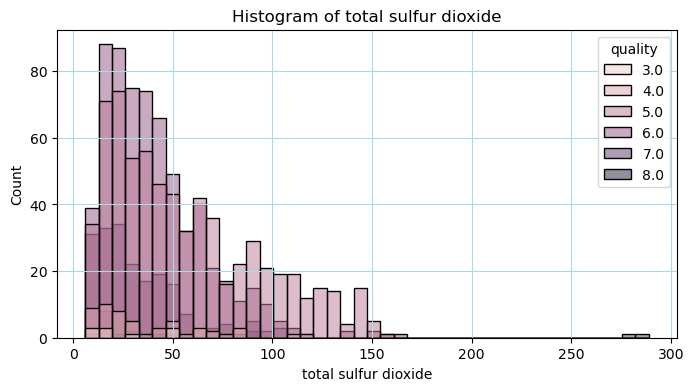

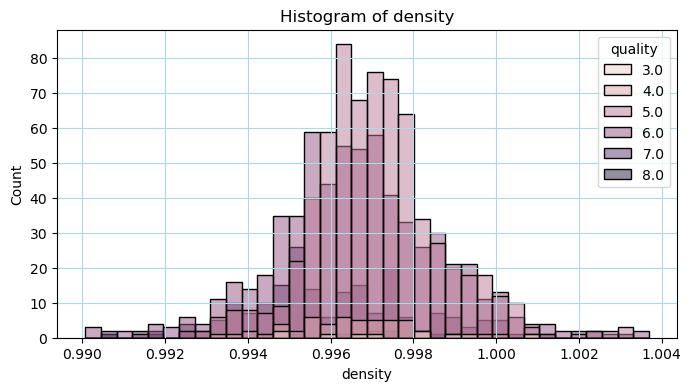

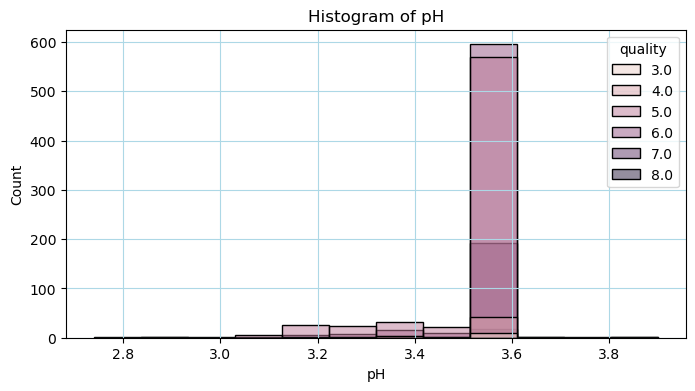

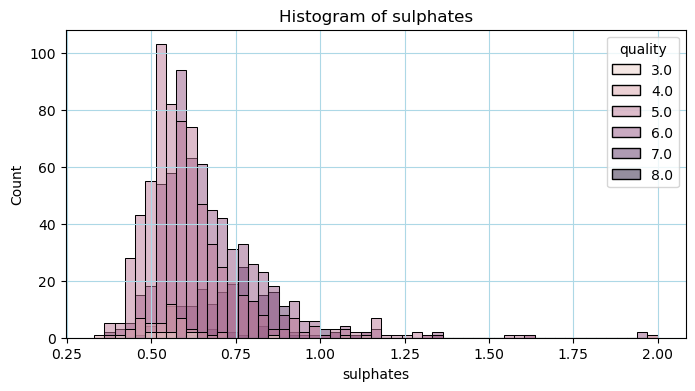

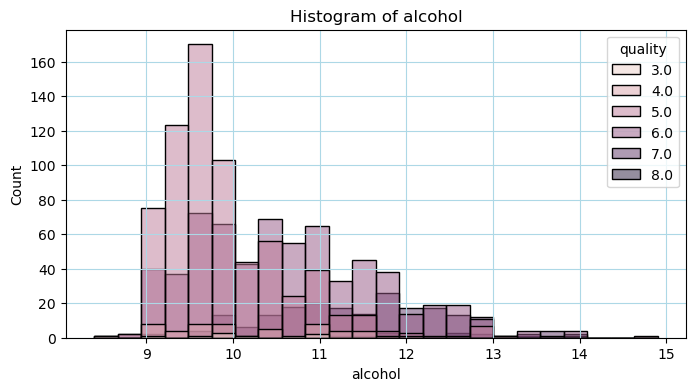

In [10]:
#plotting the box plot
def plottingfunc(column):
    plt.figure(figsize = (8,4))
    sns.histplot(data = df, x = column , hue = "quality")
    plt.title("Histogram of " + column)
    plt.grid(color = "lightblue")
    
for i in df.columns[0:len(df.columns) - 1]:
    plottingfunc(i)

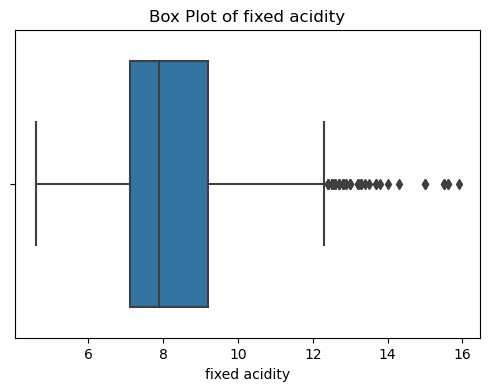

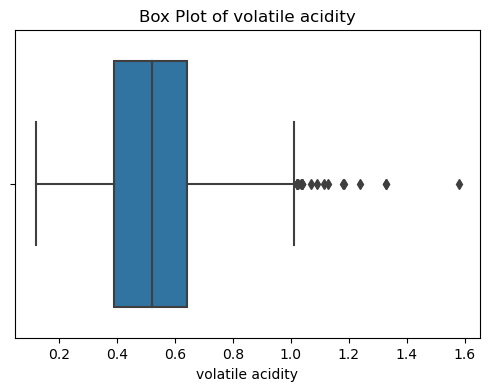

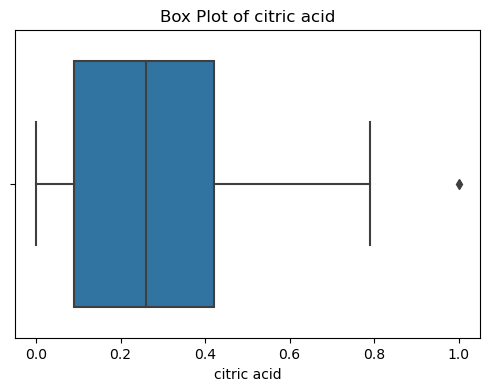

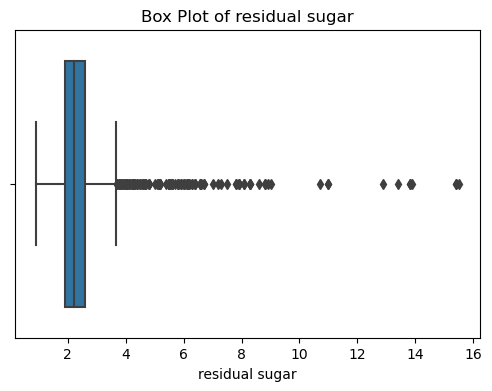

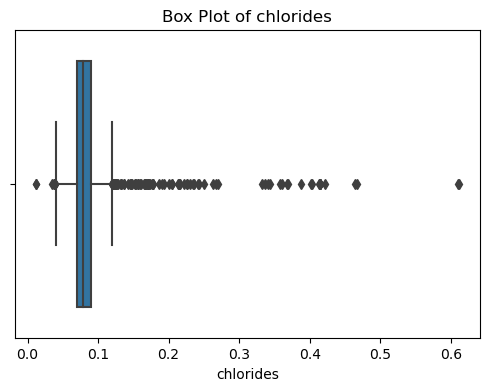

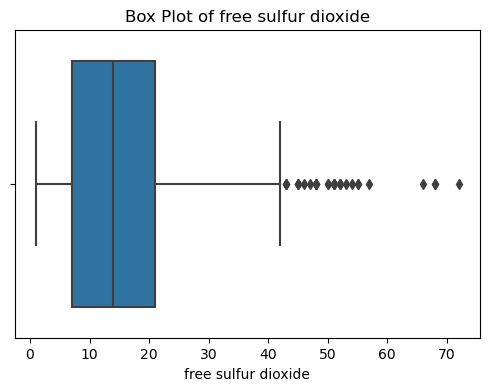

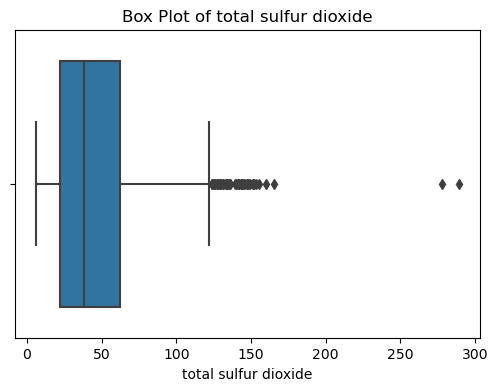

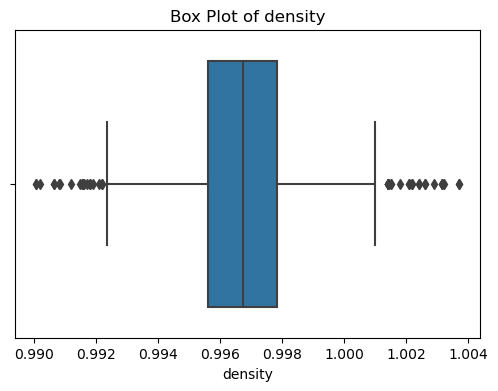

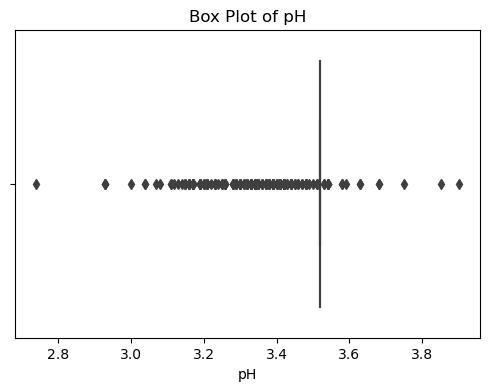

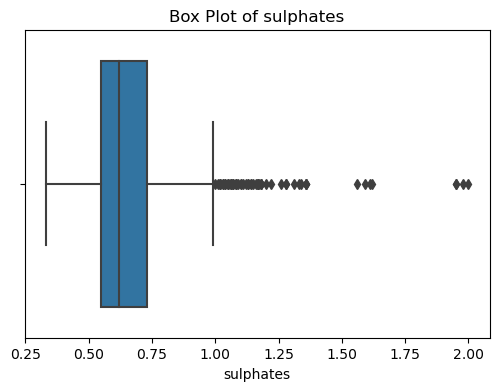

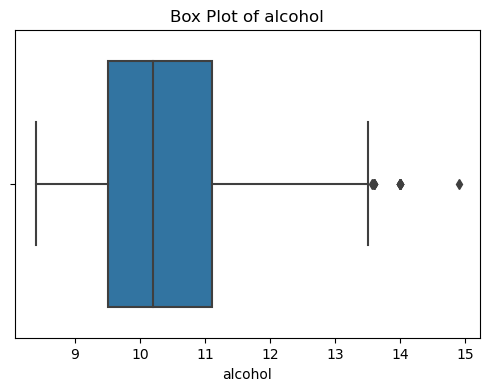

In [11]:
#plotting the box plot for the columns
def boxplot(column):
    plt.figure(figsize = (6,4))
    sns.boxplot(data =df , x = column )
    plt.title("Box Plot of " + column)

for i in df.columns[0:len(df.columns) - 1]:
    boxplot(i)


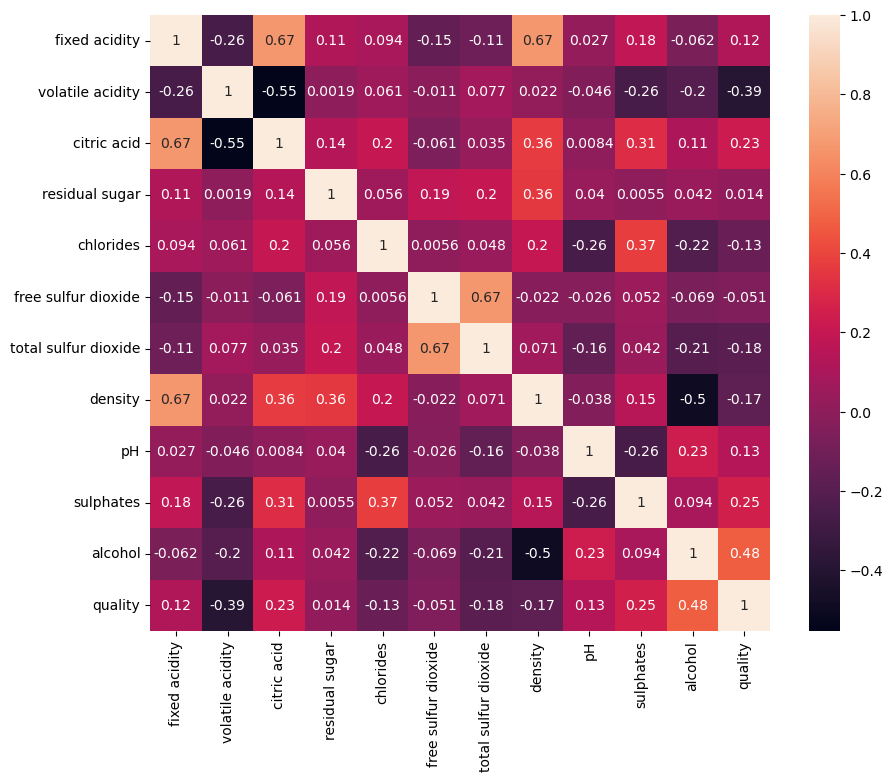

In [12]:
#plotting the heat map for the cols:
corr = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True)
plt.show()

# Data Preprocessing

In [17]:
#Processing the data 
X = df.drop(columns = {'quality'})
Y = df['quality']

In [33]:
#dividing the data into train test split
X_TRAIN ,X_TEST , Y_TRAIN , Y_TEST = train_test_split(X , Y , random_state = 42 , test_size = 0.3 )

pandas.core.frame.DataFrame

In [34]:
#scaling the data
scaler = MinMaxScaler()
X_TRAIN_SCALED = scaler.fit_transform(X_TRAIN   )
X_TEST_SCALED = scaler.fit_transform(X_TEST )
type(X_TRAIN_SCALED)

numpy.ndarray

In [43]:
#Converting scaled data into dataframe
X_TRAIN_DF = pd.DataFrame(X_TRAIN_SCALED , columns = X_TRAIN.columns ) 
X_TEST_DF = pd.DataFrame(X_TEST_SCALED, columns = X_TRAIN.columns )
# X_TRAIN_DF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.353982,0.068493,0.36,0.068493,0.086811,0.776119,0.250883,0.438326,0.672414,0.306748,0.400000
1,0.699115,0.232877,0.63,0.075342,0.098497,0.074627,0.031802,0.640969,0.672414,0.306748,0.276923
2,0.230088,0.287671,0.27,0.116438,0.120200,0.164179,0.254417,0.464758,0.672414,0.208589,0.400000
3,0.159292,0.376712,0.08,0.082192,0.055092,0.268657,0.148410,0.354626,0.672414,0.073620,0.461538
4,0.256637,0.315068,0.14,0.089041,0.108514,0.388060,0.190813,0.457416,0.672414,0.134969,0.215385
...,...,...,...,...,...,...,...,...,...,...,...
1114,0.398230,0.328767,0.00,0.068493,0.076795,0.059701,0.014134,0.560206,0.672414,0.159509,0.307692
1115,0.318584,0.352740,0.10,0.082192,0.101836,0.358209,0.190813,0.463289,0.672414,0.233129,0.384615
1116,0.230088,0.342466,0.06,0.123288,0.108514,0.208955,0.279152,0.542584,0.672414,0.104294,0.169231
1117,0.292035,0.054795,0.35,0.054795,0.070117,0.089552,0.031802,0.331131,0.672414,0.263804,0.538462


# Model Selection

In [124]:
# LINEAR REGRESSION MODEL
alg1 = LinearRegression()
alg1.fit(X_TRAIN_SCALED , Y_TRAIN )
Y_TRAIN_PRED = alg1.predict(X_TRAIN_SCALED)
Y_TEST_PRED = alg1.predict(X_TEST_SCALED )
print("R2_train :", metrics.r2_score(Y_TRAIN , Y_TRAIN_PRED)) #TARGET TRUE VS TARGET PRED
print("R2_test :", metrics.r2_score(Y_TEST , Y_TEST_PRED))
print("RMSE_train :", metrics.mean_squared_error(Y_TRAIN , Y_TRAIN_PRED))
print("RMSE_test :", metrics.mean_squared_error(Y_TEST , Y_TEST_PRED))
print("MAPE_test :", metrics.mean_absolute_percentage_error(Y_TEST , Y_TEST_PRED))
print("MAPE_tRAIN :", metrics.mean_absolute_percentage_error(Y_TRAIN , Y_TRAIN_PRED))


R2_train : 0.3615498970682929
R2_test : 0.3495510317801007
RMSE_train : 0.4205550110564959
RMSE_test : 0.41193972068912693
MAPE_test : 0.09244702536123231
MAPE_tRAIN : 0.09125291984542212


In [125]:
#Support Vector Regressor 
alg2 = SVR()
alg2.fit( X_TRAIN_SCALED , Y_TRAIN)

SVR()

In [126]:
Y_TRAIN_PRED_2 = alg2.predict(X_TRAIN_SCALED)
Y_TEST_PRED_2 = alg2.predict(X_TEST_SCALED )
print("R2_train :", metrics.r2_score(Y_TRAIN , Y_TRAIN_PRED_2)) #TARGET TRUE VS TARGET PRED
print("R2_test :", metrics.r2_score(Y_TEST , Y_TEST_PRED_2))
print("RMSE_train :", metrics.mean_squared_error(Y_TRAIN , Y_TRAIN_PRED_2))
print("RMSE_test :", metrics.mean_squared_error(Y_TEST , Y_TEST_PRED_2))
print("MAPE_test :", metrics.mean_absolute_percentage_error(Y_TEST , Y_TEST_PRED_2))
print("MAPE_tRAIN :", metrics.mean_absolute_percentage_error(Y_TRAIN , Y_TRAIN_PRED_2))

R2_train : 0.4606717821580475
R2_test : 0.36952118249164134
RMSE_train : 0.3552621944550997
RMSE_test : 0.39929230527582327
MAPE_test : 0.08735597180937765
MAPE_tRAIN : 0.07842710972732156


In [127]:
#Ridge Regression Model
alg3 = Ridge()
alg3.fit( X_TRAIN_SCALED , Y_TRAIN)

Ridge()

In [128]:
Y_TRAIN_PRED_3 = alg3.predict(X_TRAIN_SCALED)
Y_TEST_PRED_3 = alg3.predict(X_TEST_SCALED )
print("R2_train :", metrics.r2_score(Y_TRAIN , Y_TRAIN_PRED_3)) #TARGET TRUE VS TARGET PRED
print("R2_test :", metrics.r2_score(Y_TEST , Y_TEST_PRED_3))
print("RMSE_train :", metrics.mean_squared_error(Y_TRAIN , Y_TRAIN_PRED_3))
print("RMSE_test :", metrics.mean_squared_error(Y_TEST , Y_TEST_PRED_3))
print("MAPE_test :", metrics.mean_absolute_percentage_error(Y_TEST , Y_TEST_PRED_3))
print("MAPE_tRAIN :", metrics.mean_absolute_percentage_error(Y_TRAIN , Y_TRAIN_PRED_3))

R2_train : 0.3607245416005679
R2_test : 0.34699869578513876
RMSE_train : 0.42109868295232733
RMSE_test : 0.4135561558412141
MAPE_test : 0.09289027552296814
MAPE_tRAIN : 0.09143659584392194


In [129]:
#XGBoost Regressor
alg4 = XGBRegressor()
alg4.fit( X_TRAIN_SCALED , Y_TRAIN)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [130]:
Y_TRAIN_PRED_4 = alg4.predict(X_TRAIN_SCALED)
Y_TEST_PRED_4 = alg4.predict(X_TEST_SCALED )
array = []
array.append(metrics.r2_score(Y_TRAIN , Y_TRAIN_PRED_4)) #TARGET TRUE VS TARGET PRED
array.append( metrics.r2_score(Y_TEST , Y_TEST_PRED_4))
array.append(metrics.mean_squared_error(Y_TRAIN , Y_TRAIN_PRED_4))
array.append( metrics.mean_squared_error(Y_TEST , Y_TEST_PRED_4))
array.append(metrics.mean_absolute_percentage_error(Y_TEST , Y_TEST_PRED_4))
array.append(metrics.mean_absolute_percentage_error(Y_TRAIN , Y_TRAIN_PRED_4))
array2 = ["R2_train","R2_test","RMSE_train","RMSE_test","MAPE_test","MAPE_tRAIN"] 
array2
dff = pd.DataFrame(array , columns = ['XGBoost'])
dff.index = array2 
dff

,XGBoost
R2_train,0.997819
R2_test,0.398835
RMSE_train,0.001437
RMSE_test,0.380727
MAPE_test,0.080819
MAPE_tRAIN,0.004369


In [159]:
r2_train= []
rmse_train = []
mape_train = []
r2_test= []
rmse_test = []
mape_test = []
e = []
e.append(Y_TRAIN_PRED)
e.append(Y_TRAIN_PRED_2)
e.append(Y_TRAIN_PRED_3)
e.append(Y_TRAIN_PRED_4)

f = []
f.append(Y_TEST_PRED)
f.append(Y_TEST_PRED_2)
f.append(Y_TEST_PRED_3)
f.append(Y_TEST_PRED_4)

for i in range(0,4):
    r2_train.append(metrics.r2_score(Y_TRAIN ,e[i] ))
    rmse_train.append(metrics.mean_squared_error(Y_TRAIN ,e[i] ))
    mape_train.append(metrics.mean_absolute_percentage_error(Y_TRAIN , e[i]))
    r2_test.append(metrics.r2_score(Y_TEST ,f[i] ))
    rmse_test.append(metrics.mean_squared_error(Y_TEST ,f[i] ))
    mape_test.append(metrics.mean_absolute_percentage_error(Y_TEST , f[i]))

df_reg = pd.DataFrame(list(zip(r2_train , rmse_train , mape_train, r2_test, rmse_test, mape_test )), columns = ["r2_train", "rmse_train" , "mape_train", "r2_test", "rmse_test","mape_test"]       )
array3 = ["Linear_Reg","SVR","RIDGE", "XG_BOOST"] 

df_reg.index = array3
df_reg                                         #DolchiXRajjo

,r2_train,rmse_train,mape_train,r2_test,rmse_test,mape_test
Linear_Reg,0.361550,0.420555,0.091253,0.349551,0.411940,0.092447
SVR,0.460672,0.355262,0.078427,0.369521,0.399292,0.087356
RIDGE,0.360725,0.421099,0.091437,0.346999,0.413556,0.092890
XG_BOOST,0.997819,0.001437,0.004369,0.398835,0.380727,0.080819


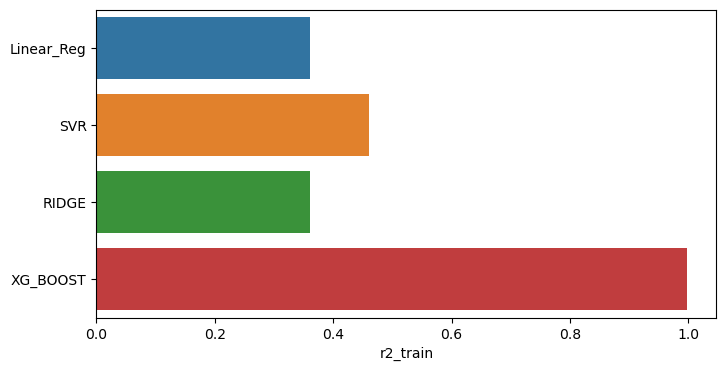

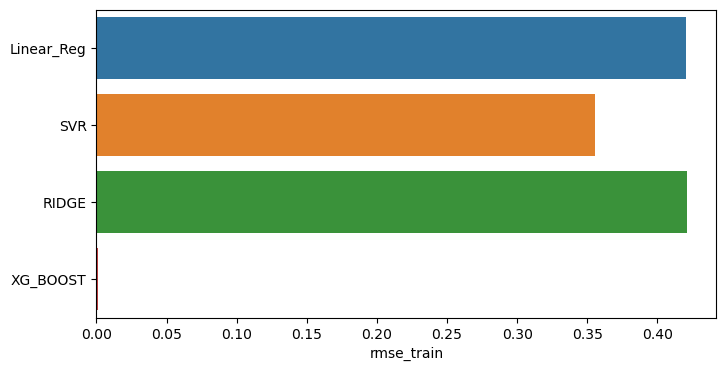

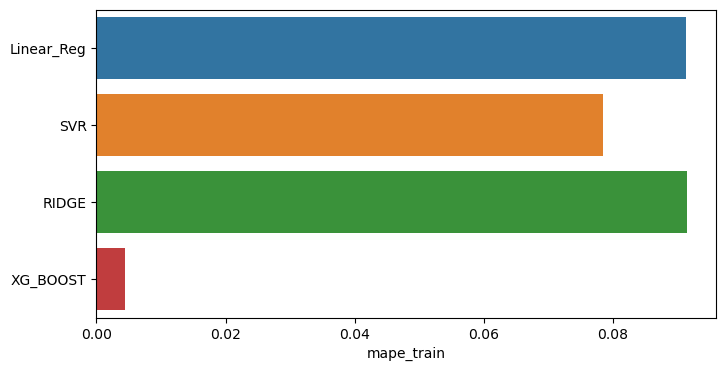

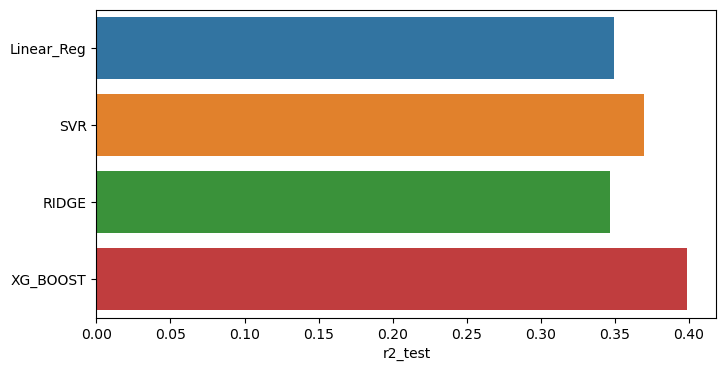

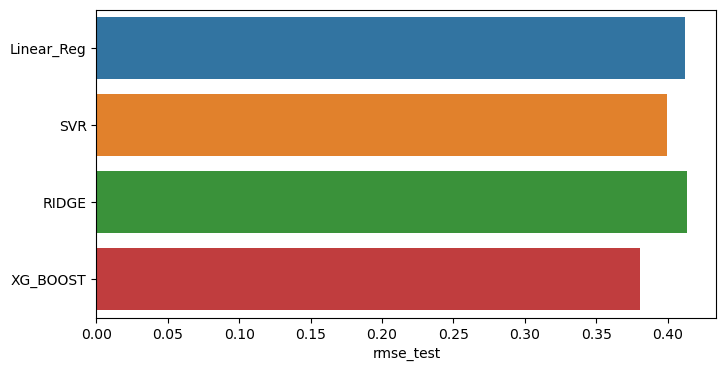

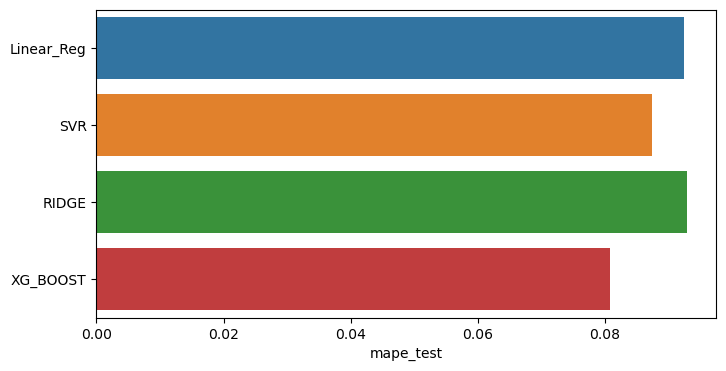

In [162]:
def barplot(cols):
    plt.figure(figsize = (8,4))
    sns.barplot(data = df_reg ,y = df_reg.index , x = cols)
    plt.show()

for i in df_reg.columns:
    barplot(i)